# IMPORTING  IMPORTANT LIBRARIES

In [524]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


# LOADING THE DATASET


In [528]:
df=pd.read_csv("loan_approval_dataset.csv")
df.shape

(4269, 13)

# DATA PREPROCESSING

In [247]:
df.shape

(4269, 13)

In [249]:
print(df.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [251]:
# checking for null and missing values
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [253]:
# checking the datatype
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

The dataset has 4 kinds of assests that are - Residential, Commericial, Luxury and Bank. I
am categorizing these assets in to two category i.e. Movable and Immovable assets. The
Residential and Commericial assest would be added to the Immovable assets and Luxury
and Bank assets would be added to the Movable assets.

In [530]:
# movable assset 
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']
#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']



In [532]:
df.drop(columns=[' bank_asset_value',' luxury_assets_value',' commercial_assets_value',' residential_assets_value'])

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,1,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,4,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000
...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,Rejected,4100000,3300000
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,12900000,7100000
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,Rejected,25400000,13600000
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,Approved,19900000,8900000


DESCRIPTIVE STATISTICS

In [259]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Movable_assets,Immovable_assets
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,2.010300e+07,1.244577e+07
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,1.183658e+07,9.232541e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,3.000000e+05,-1.000000e+05
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,1.000000e+07,4.900000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.960000e+07,1.060000e+07
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,2.910000e+07,1.820000e+07
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,5.380000e+07,4.660000e+07


In [20]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Movable_assets,Immovable_assets
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,30700000,20000000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,12100000,4900000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,46100000,11600000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,31200000,21500000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,34400000,20600000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
 13  Movable_assets             4269 non-null   int64 
 14  Immovabl

# EXPLORATORY DATA ANALYSIS

In the exploratory data analysis, I will be looking at the distribution of the data across the
varaiables, followed by relationship between the independent and target variable and
the correlation among the variables. Through the visualization, I will be able to
understand the possible trends and patterns in the data and come to know about the
hidden insights of the data.


C:\Users\shovi\AppData\Local\Temp\ipykernel_24108\1068584206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' no_of_dependents',data=df,palette='pastel')


Text(0.5, 1.0, 'NUMBER OF DEPENDENTS')

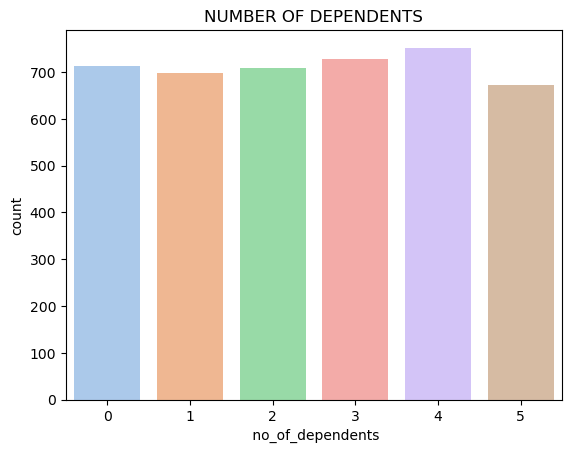

In [261]:
#NUMBER OF DEPENDENTS
sns.countplot(x=' no_of_dependents',data=df,palette='pastel')
plt.title("NUMBER OF DEPENDENTS")

This graph shows the number of dependent indivduals on the loan applicant. There is
not much difference in the number of dependents, however, there are more applicants
with 4 and 3 dependents than the other categories. Since the number of dependents
increases the disposable income of the applicant decreases. So I assume that that the
number of applicants with 0 or 1 dependent will have higher chances of loan approval

 # EDUCATION AND INCOME

C:\Users\shovi\AppData\Local\Temp\ipykernel_24108\2962208740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0],palette='Set2')
C:\Users\shovi\AppData\Local\Temp\ipykernel_24108\2962208740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1],palette='Set2')


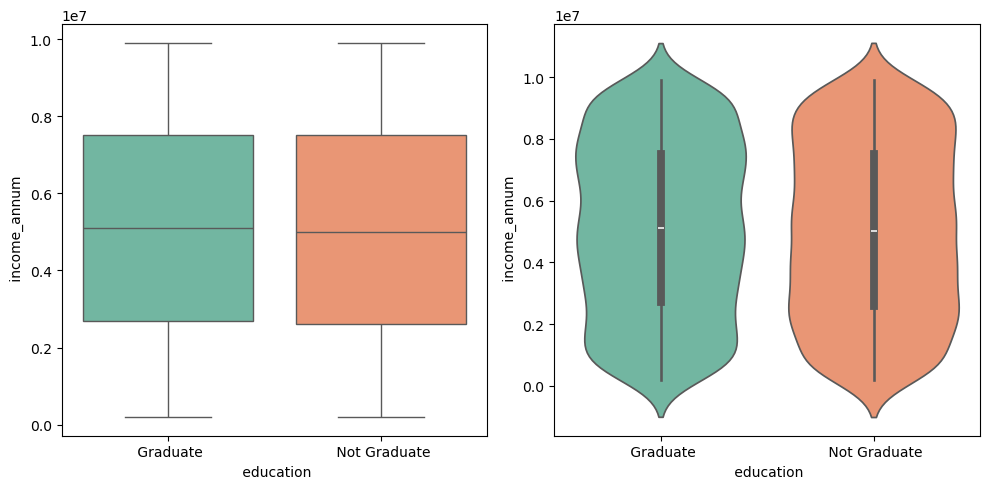

In [26]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0],palette='Set2')
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1],palette='Set2')
plt.tight_layout()
plt.show()

These two graphs - boxplot and violinplot visualizes the education of applicants along
with their annual income. The boxplot shows some interesting fact that both the
graduates and non-graduates have nearly same median income with very small increase
in income of graduates. Moreover the violinplot shows the distribution of income among
the graduates and non graduate applicants, where we can see that non graduate
applicants have a even distribution between income 2000000 and 8000000, whereas
there is a uneven distribution among the graduates with more applicants having income
between 6000000 and 8000000. Since there is not much change in annual income of
graduates and non graduates, I assume that education does not play a major role in the
approval of loan.

 # EMPLOYEMENT STATUS AND EDUCATION

Text(0.5, 1.0, 'Self_employed')

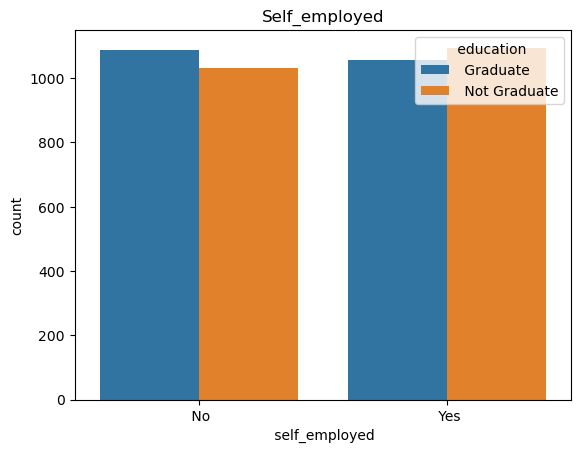

In [28]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self_employed')

This graph shows the number of self employed applicants along with their education.
From the educational prepespective the majority of the graducate applicants are not self
employed wheareas majority of the non-graduates are self employed. This means that
graduates applicants are more likely to be salaried employees and non-graduates are
more likely to be self employed. This could be a determining factor in loan approval
because salaried employees are more likely to have a stable income and hence are more
likely to pay back the loan as compared to self employed applicants whose income may
not be stable. But this could also be possible that the self employed applicants are
earning more than the salaried employees and hence are more likely to pay back the
loan. This is a very important factor to consider while predicting the loan approval.


# LOAN AMOUNT AND TENURE

Text(0.5, 1.0, 'LOAN AMOUNT VS LOAN TERM')

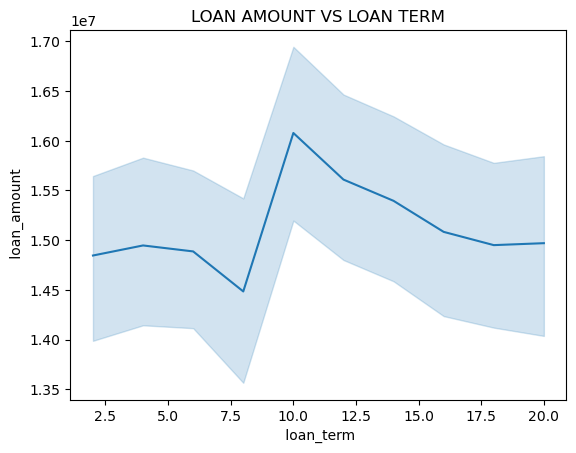

In [31]:
sns.lineplot(x=' loan_term',y=' loan_amount' ,data=df).set_title('LOAN AMOUNT VS LOAN TERM')

This line plot shows the trend between the loan amount and the loan tenure. Between
the loan tenure of 2.5 - 7.5 years the loan amount is between 1400000 - 15500000.
However the loan amount is significantly higher for the loan tenure of 10 years

# CIBIL SCORE DISTRIBUTION 

<Axes: xlabel=' cibil_score', ylabel='Count'>

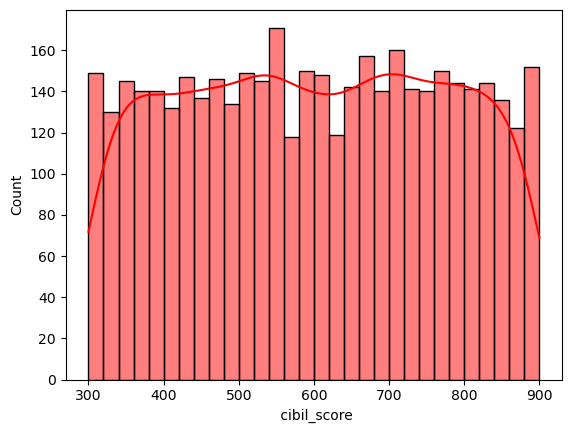

In [47]:

sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

# Asset Distribution

<Axes: xlabel='Immovable_assets', ylabel='Count'>

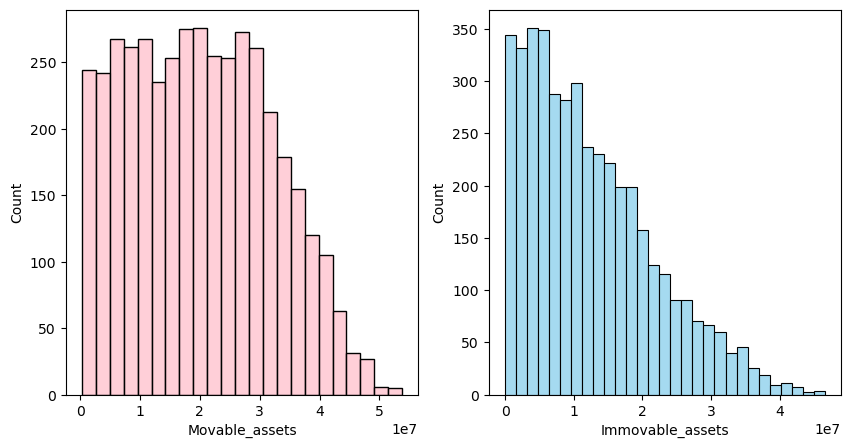

In [56]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='pink')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='skyblue')

 Assets play a major role in loan application. They provides a security to the bank that the
person will repay the loan. Looking at the assets, as eralier mentionedI have categorized
them in movable and immovable assets. The above graphs shows the distribution of
movable and immovable assets in the dataset.
Looking at the movable assets which include bank assets and luxury assets, majority of
the applicants have less than 30 million and there is a slight trend of decreasing number
of applicants as the movable assets increases. Coming to the immovable assets, which
include residential assets and commercial assets, majority of the applicants have less
than 15 million of immovable assets and there is a strong trend of decreasing number of
applicants as the immovable assets increases after 20 million.
Till now in the EDA, I have explored the distribution of data across the various features as
well as relationship between the some of the variables as well and made some
assumptions and hypothesis. Now, in order to prove my assumptions and hypothesis I
will be looking at the visualization of the relation between the independent variables and
the target variable.


# Number of Dependants Vs Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

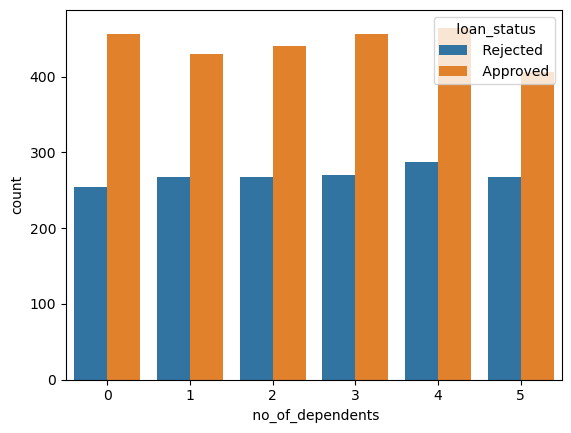

In [61]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')


My hypothesis regarding the loan approval based on number of dependents has mixed
results. First the hypothesis was somewhat true regarding the rejection chances, the
number of loan rejection increases with increase in number of dependents. But the
hypothesis was not true regarding the approval chances, the number of loan approval
decreases with increase in number of dependents as per my hypothesis. But according to
this graph, there has been no major change in the loan approval count with increase in
number of dependents. So, my hypothesis regarding the loan approval based on number
of dependents is not true.


# Education Vs Loan Status

Text(0.5, 1.0, 'Loan Statuts by  Education')

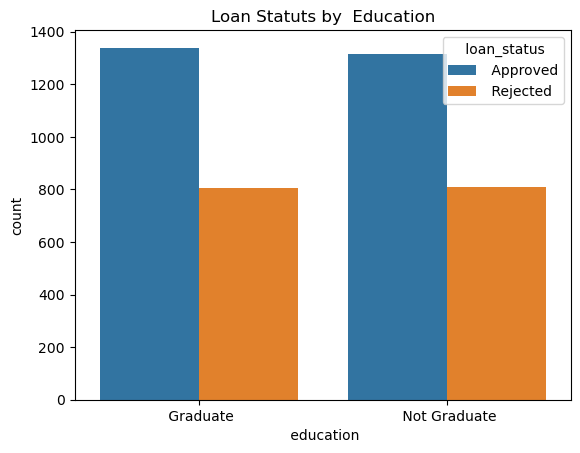

In [65]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Statuts by  Education')

My hypothesis regarding the education not being factor in loan approval was right. The
graph shows very minor difference between loan approval and rejection count for the
graduate and non graduate applicants. The difference is not significant enough.

# Annual Income vs Loan Status 

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

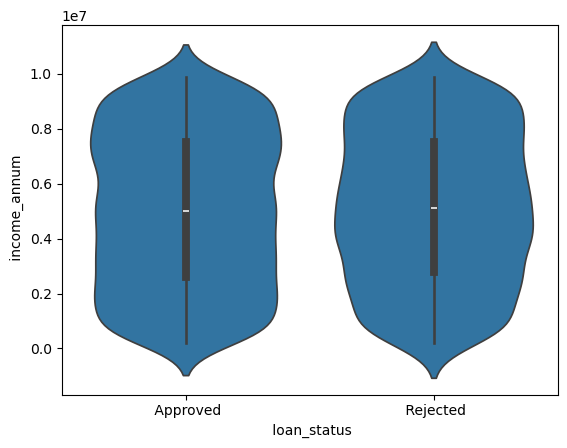

In [71]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)


On the whole, there has been no major difference between the annual incomes of the
applicant with approved or rejected loan. But still, the approved loan applicants tend to
have a higher annual income than the rejected loan applicants which is visible from the
violin plot where the approved loan applicants have a higher density in the annual
income near 8 miilion annual income.


# loan amount and tenure vs loan status

Text(0, 0.5, 'loan_amount (10^7)')

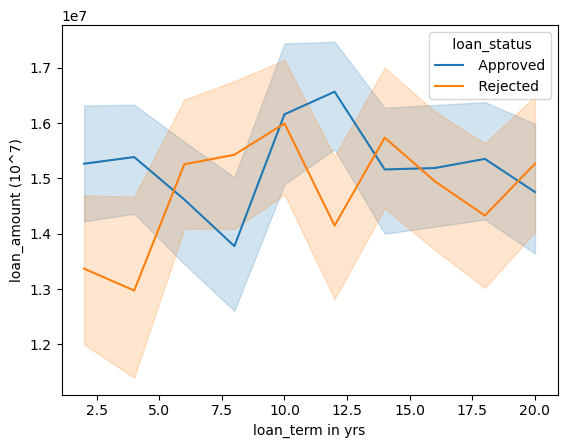

In [89]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')
plt.xlabel("loan_term in yrs")
plt.ylabel("loan_amount (10^7)")


 #This graph shows the relation between loan amount, loan tenure and loan status.
  Generally, the approved loans tend have higher amount and shorter repayment tenure.
The rejected loans tend to have lower amount and longer repayment tenure. This could
be a result of the bank's policy to reject loans with longer repayment tenure. The bank
may also reject loans with lower amount as they may not be profitable for the bank.


# CIBIL SCORE VS LOAN STATUS

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

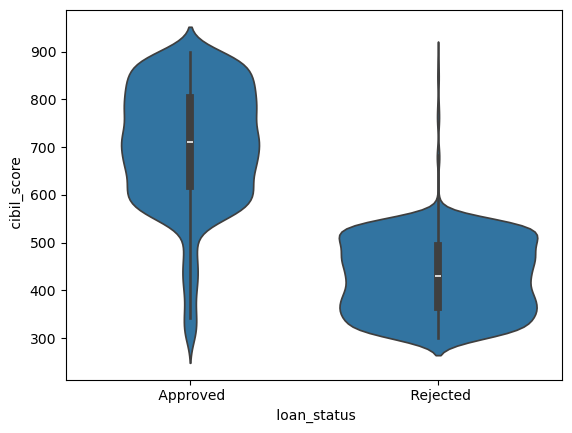

In [93]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

My hypothesis regarding the cibil score and loan approval is absolutely correct. It is
evident through the violinplot, where the there is a high distribution above 600 cibil
score from the loan approved category. The distribution of the loan not approved
category is more spread out and has cibil score less than 550. This also proves my
assumption that majority of the applicants have a poor/fair cibil score which affects their
loan approval. Hence, having a high cibil score particularly grater than 600 would
definitely increase the chances of loan approval.

 # Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

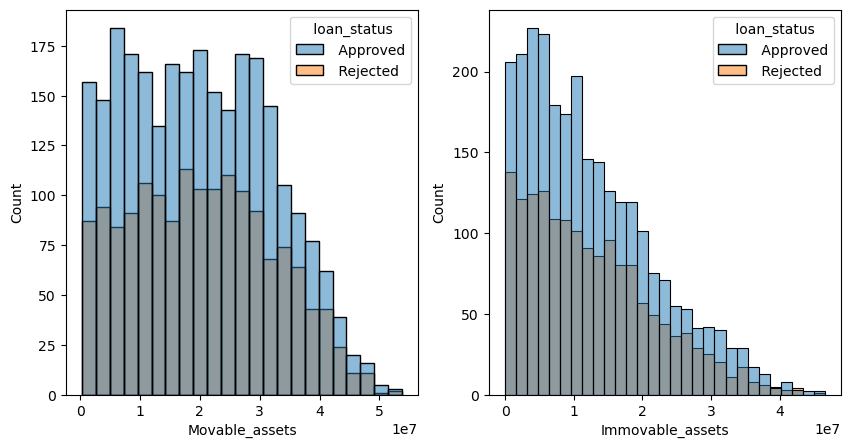

In [97]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status')
sns.histplot(x = 'Immovable_assets', data = df, ax=ax[1], hue = ' loan_status')


Assets provide security to the bank against which the loan is issued. These two graph
visualizes the relation between the movable and immovable assets along with the loan
status. The both graph shows that, with increase in the assets the chances of loan
approval increases and rejection decreases. The graph also shows that, the movable
assets are more than the immovable assets.


# DATA PREPROCESSING 2

LABEL ENCODING THE CATEGORICAL VARIABLE

In [263]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
Movable_assets                int64
Immovable_assets              int64
dtype: object

In [ ]:
# education , self_employed and loan_status are categorical data hence they will be encoded

In [534]:
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})


In [536]:
df[" education"].unique()

array([1, 0], dtype=int64)

In [538]:
# checking for duplicate value
df.duplicated().sum()

0

In [540]:
# checking for null values
df.isnull().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
Movable_assets               0
Immovable_assets             0
dtype: int64

# correlation matrix heatmap

<Axes: >

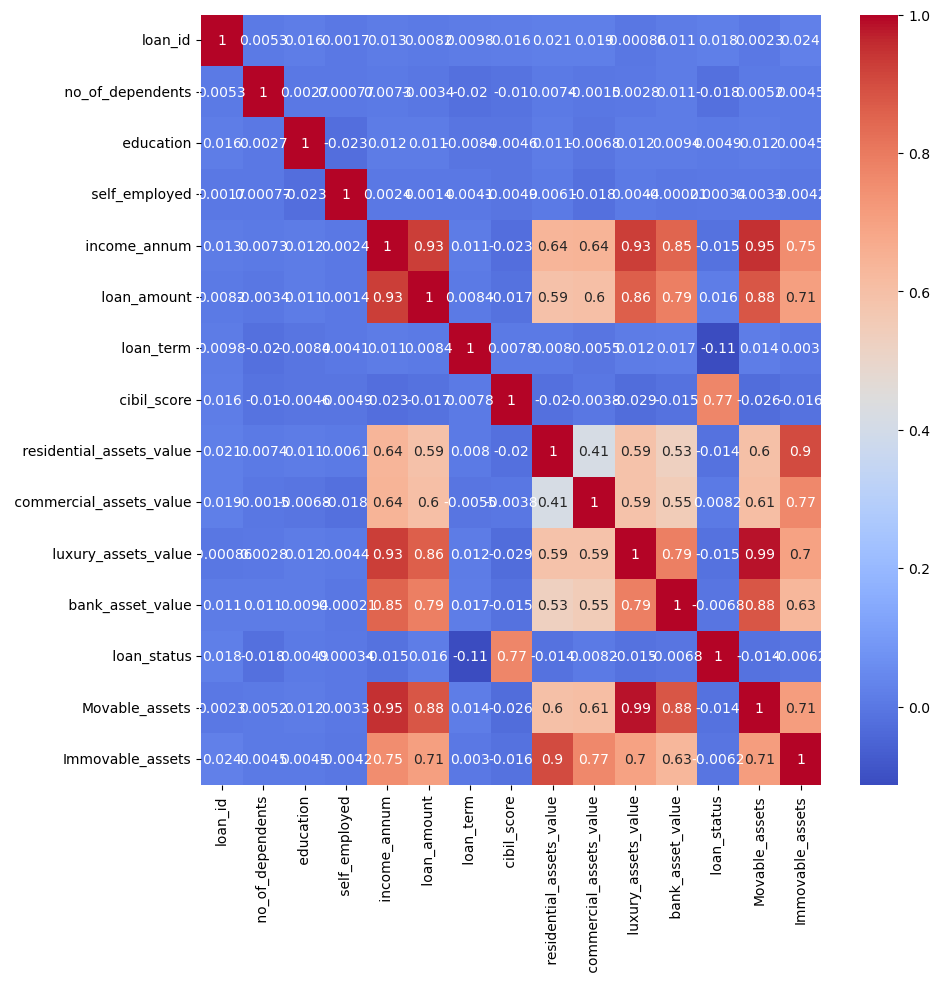

In [542]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

This coorelation matrix heatmap has the folowing strong correlations:
1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The coorelation between the movable and immovable assets is justified because both
come under assets and its obvious that person with more movable assets will have more
immovable assets and vice versa. Same is with Income and Movables and Immovale
assets. The person with greater income will have greater assets.
Now, I will be exploring the coorleation between Assets and Loan Amount, and also
between Income and Loan Amount. The relation between the loan status and cibil score is already explored in previous section .

# ASSEST VS LOAN AMOUNT

Text(0.5, 1.0, 'immovable asset vs loan amount')

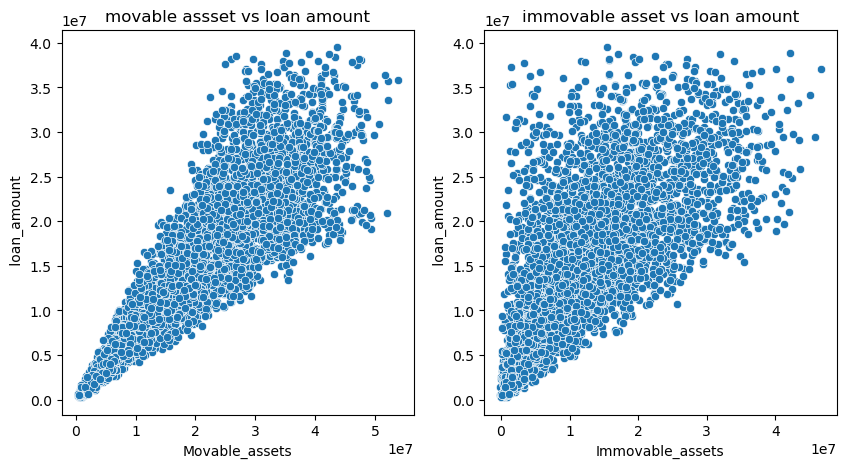

In [281]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title("movable assset vs loan amount")
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title("immovable asset vs loan amount")

The loan amount has positive relation with movable and immovable assets. The more the
assets, the more the loan amount issued by the bank.


# LOAN AMOUNT VS INCOME


Text(0.5, 1.0, 'loan amount vs income')

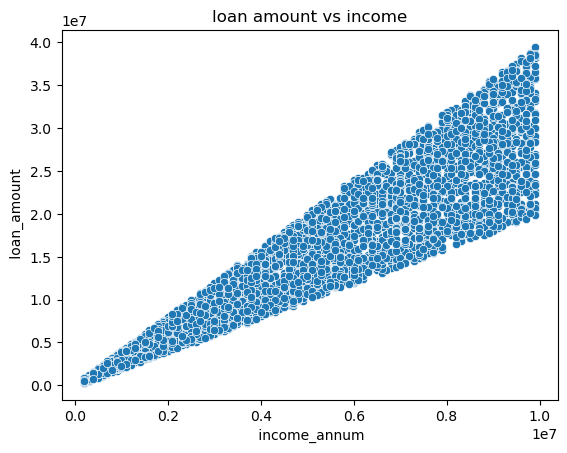

In [292]:
sns.scatterplot(x=' income_annum',y=' loan_amount',data=df).set_title("loan amount vs income")

 The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

In [544]:
# checking for outliers
si=df[['loan_id',' no_of_dependents',' income_annum',' loan_amount',' loan_term',' cibil_score','Movable_assets','Immovable_assets']]
si

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
0,1,2,9600000,29900000,12,778,30700000,20000000
1,2,0,4100000,12200000,8,417,12100000,4900000
2,3,3,9100000,29700000,20,506,46100000,11600000
3,4,3,8200000,30700000,8,467,31200000,21500000
4,5,5,9800000,24200000,20,382,34400000,20600000
...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,4100000,3300000
4265,4266,0,3300000,11300000,20,559,12900000,7100000
4266,4267,2,6500000,23900000,18,457,25400000,13600000
4267,4268,1,4100000,12800000,8,780,19900000,8900000


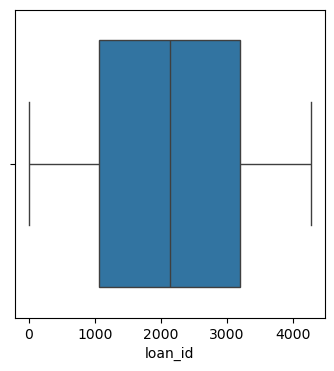

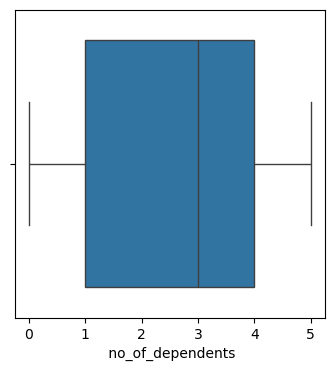

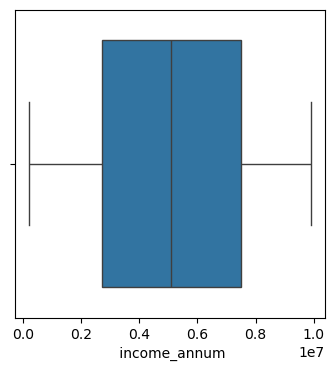

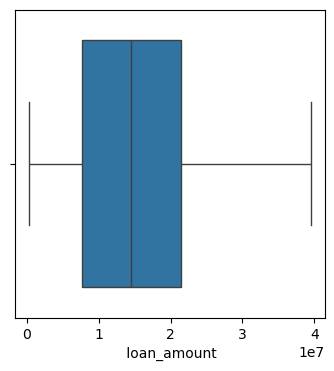

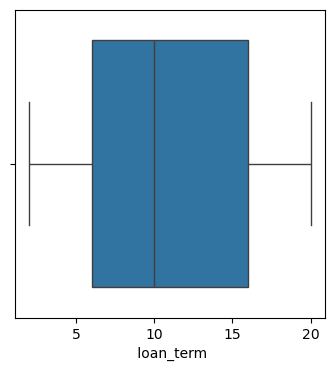

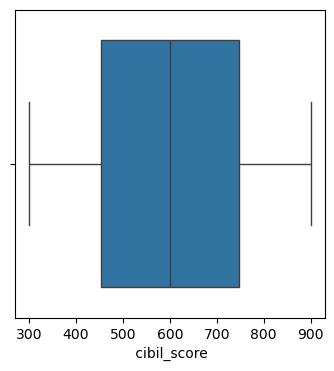

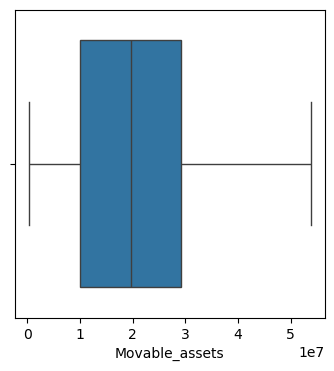

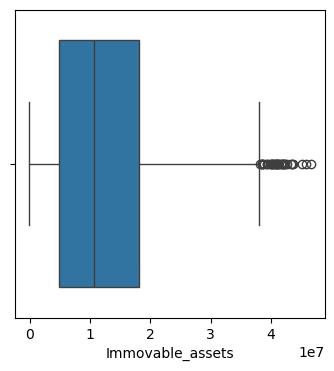

In [546]:
for col in si:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df,x=col)

In [548]:
# finding  number of outliers for immovable_assets
t1=df['Immovable_assets'].quantile(0.25)
t3=df['Immovable_assets'].quantile(0.75)
lower_limit=t1-1.5*(t3-t1)
upper_limit=t3+1.5*(t3-t1)
outliers=df[(df['Immovable_assets']<lower_limit)|(df['Immovable_assets']>upper_limit)]
num_outliers=len(outliers)
print(num_outliers)


34


In [550]:
# handling outlier
df['Immovable_assets']=np.where(df['Immovable_assets']>upper_limit,upper_limit,
                                            np.where(df['Immovable_assets']<lower_limit,lower_limit,
                                            df['Immovable_assets']))


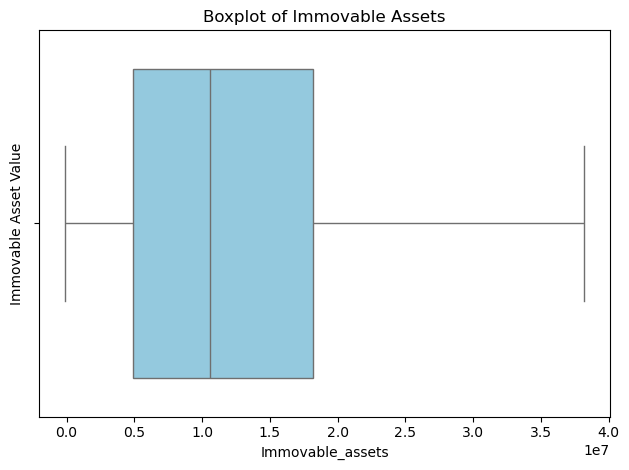

In [552]:
# boxplot after removing outliers
sns.boxplot(x='Immovable_assets', data=df, color='skyblue')
plt.title('Boxplot of Immovable Assets')
plt.ylabel('Immovable Asset Value')
plt.tight_layout()
plt.show()


# TRAIN TEST SPLIT

In [556]:
y=df.iloc[:,-3]
y.shape

(4269,)

In [623]:
x=df.drop(columns=[' loan_status'])

In [625]:
x

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Movable_assets,Immovable_assets,logit
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,30700000,20000000.0,2.582089
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,12100000,4900000.0,1.233728
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,46100000,11600000.0,-1.100128
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,31200000,21500000.0,1.057249
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,34400000,20600000.0,-3.285329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,4100000,3300000.0,-1.694498
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,12900000,7100000.0,-1.231408
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,25400000,13600000.0,-2.294062
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,19900000,8900000.0,2.860585


In [560]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.metrics import r2_score

# Logistic regression

In [629]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [631]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [633]:
# prediction
y_pred = model.predict(x_test)

In [635]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.819672131147541
Confusion Matrix:
 [[208 110]
 [ 44 492]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.65      0.73       318
           1       0.82      0.92      0.86       536

    accuracy                           0.82       854
   macro avg       0.82      0.79      0.80       854
weighted avg       0.82      0.82      0.81       854



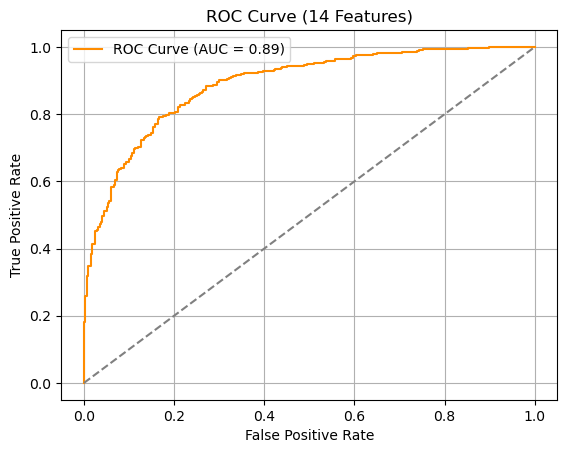

In [608]:
# Step 1: Train on original 14-feature dataset
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Step 2: Predict on same structure (X_test must also have 14 columns)
y_probs = model.predict_proba(x_test)[:, 1]

# Step 3: Plot ROC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (14 Features)")
plt.legend()
plt.grid(True)
plt.show()


AUC SCORE OF 0.89 INDICATES THE DESCENT RESULT

# DECISION TREE

In [450]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree object
dtree = DecisionTreeClassifier()


In [452]:

# Trainign the model using the training data
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [454]:
dtree.score(x_train, y_train)

1.0

In [456]:
dtree_pred = dtree.predict(x_test)
dtree_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

# RANDOM FOREST 

In [458]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rfc = RandomForestClassifier()
# training the model using training data
rfc.fit(x_train, y_train)
#training accuracy
rfc.score(x_train, y_train)

1.0

In [460]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(x_test)

# MODEL EVALUATION

CONFUSION MATRIX

Text(0.5, 14.722222222222216, 'Predicted')

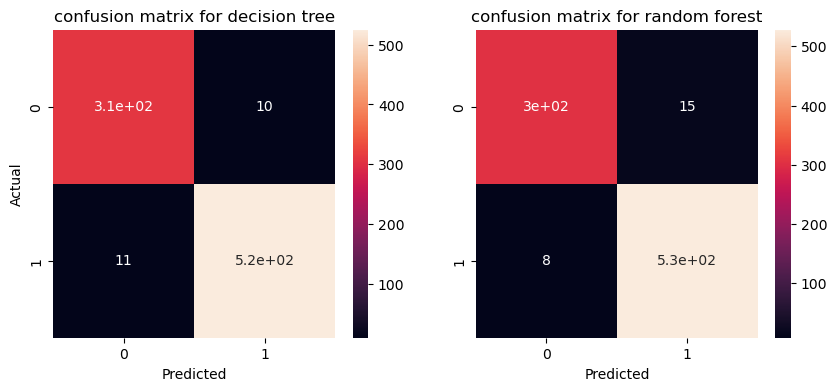

In [647]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title("confusion matrix for decision tree")
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title("confusion matrix for random forest")
ax[1].set_xlabel('Predicted')

 The above confusion matrix heatmap visualizes the the true positive and true negative
value counts in both the machine learning models. The decision tree classfier has only 17
false positve and negative valyes where has random forest classifier has 21 false postive
and negative values. The decision tree classifier has a better accuracy compared to
random forest classifier

## DISTRIBUTION PLOT

C:\Users\shovi\AppData\Local\Temp\ipykernel_24108\1243567680.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\shovi\AppData\Local\Temp\ipykernel_24108\1243567680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

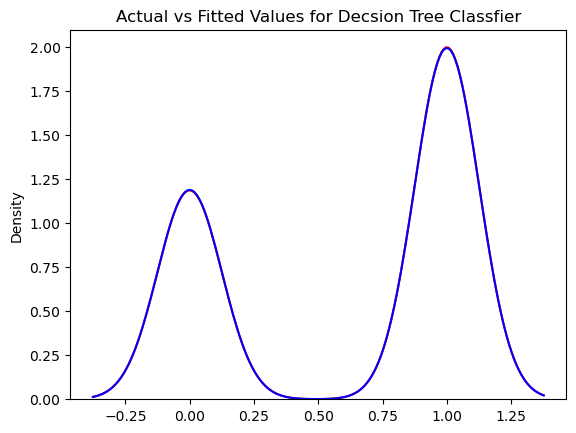

In [652]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values")
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

C:\Users\shovi\AppData\Local\Temp\ipykernel_24108\1092587374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\shovi\AppData\Local\Temp\ipykernel_24108\1092587374.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

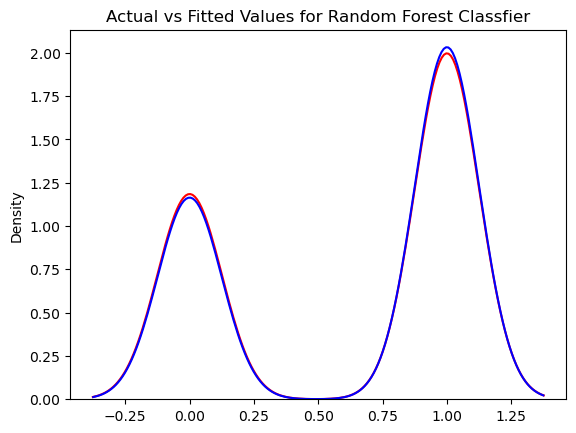

In [661]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values",)
plt.title('Actual vs Fitted Values for Random Forest Classfier')


The distribution plot of both the models are almost same. There is very minute difference
in the distribution density of the predicted and actual values in the random forest
classifer. However, in case of decision tree classifier, the distribution density of the
predicted values clearly overlaps with the actual values. Hence, we can say that the
decision tree classifier is a better model than the random forest classifier for this dataset.


# CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

# XG BOOST 

In [683]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [685]:
from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4,random_state=32)
# Fit the model
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [687]:
y_xgb_pred = xgb_model.predict(x_test)
from sklearn.metrics import mean_absolute_error, r2_score
print("XGBoost MAE:", mean_absolute_error(y_test, y_xgb_pred))
print("XGBoost R² Score:", r2_score(y_test, y_xgb_pred))

XGBoost MAE: 0.039903843825403136
XGBoost R² Score: 0.930834944269307


# CLASSIFICATION REPORT

In [666]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [668]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

R2 score:  0.8947831596733314
Mean Squared Error:  0.02459016393442623
Mean Absolute Error:  0.02459016393442623


R2 score:  0.8847625082136487
Mean Squared Error:  0.026932084309133488
Mean Absolute Error:  0.026932084309133488


From all the above metrics, graphs and reports, I conclude that descision tree classifier is
a better machine learning model to predict the loan approval status of a person.


# CONCLUSION

From the exploratory data analysis, we can conclude that the following factors are
important for the approval of loan:


CIBIL Score: People with higher CIBIL score have higher chances of loan approval.

No of Dependents: People with more number of dependents have less chances
of loan approval.

Assets: People with more assets ( including movable and immovable) have higher
chances of loan approval

Loan Amount and Tenure: People with higher loan amount and lower tenure have
more chances of loan approval 

Coming to the machine learning models,I have used Logistic Regression,Decision Tree Classifier,Random Forest Classifier and Xgboost classifier. Logistic Regression gives accuracy of 81.9 ,decision tree and random forest have given excellent results having accuracies 89.4 % and 88.4 % repectively,whereas Xg boost classifier has yield results with most accuracy of 93%.
